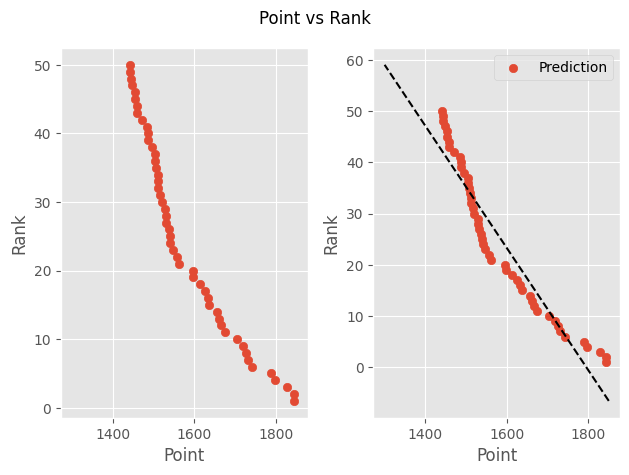

Model Accuracy : 0.91 ٪ 
 ______________________________
 Your Point : 400 
 Your Rank  : 166


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')   
from sklearn.metrics import r2_score
import numpy as np 

Data = pd.read_csv('Fifa.csv')


def Data_Cleaning():

    Data.rename(columns={'Rank ↑↓':'Rank'},inplace=True)
    Data.drop([10,22,34,46],inplace=True)
    Data.drop(['Unnamed: 0','Prev. Rank'],axis=1,inplace=True)
    Data.reset_index(drop=True , inplace=True) 
    Data['Current Point'] = Data['Current Point'].astype(float)
    Data['Prev. Point'] = Data['Prev. Point'].astype(int)
    Data['Rank'] = Data['Rank'].astype(int)


Data_Cleaning()

Data['Difference'] = Data['Current Point'] - Data['Prev. Point']


for i in Data.index: 

    '''Teams Conditions Base On CurrentPoint - PrevPoint
    '''

    if Data.loc[i,'Difference'] >= 0:
        Data.loc[i,'Condition'] = '+'
    else:
        Data.loc[i,'Condition'] = '-'


mymodel = np.poly1d(np.polyfit(Data['Current Point'],Data['Rank'], 1))              # polynomial model     # 1 :: Our Accuracy
Accuracy = r2_score(Data['Rank'], mymodel(Data['Current Point']))                   # Show R_Squared       # Accuracy    # 0< R_squared <1 (Near 1 is Better)

myline = np.linspace(1850, 1300, 100)


fig , (ax1,ax2) = plt.subplots(nrows=1 ,ncols=2 ,sharex=True)

ax1.scatter(Data['Current Point'] , Data['Rank'])
ax2.scatter(Data['Current Point'],Data['Rank'],label='Prediction')

ax2.plot(myline, mymodel(myline) ,'k--')

ax2.legend()    
ax1.set_xlabel('Point')
ax1.set_ylabel('Rank')
ax2.set_xlabel('Point')
ax2.set_ylabel('Rank')
plt.suptitle('Point vs Rank')
plt.tight_layout()
plt.show() 

print('Model Accuracy :','%.2f'%(Accuracy),'٪','\n','_'*30)

Your_Point = 400                                                  # Enter Your Point
Rank = mymodel(Your_Point)   
if Rank <= 0:
    Rank = 1
print(' Your Point :',Your_Point,'\n Your Rank  :',int(Rank))     # Receive Your Rank

## Teams Condition Base On CurrentPoint - PrevPoint

In [2]:
Data.set_index('Rank' , inplace=True)
Data

,Team,Current Point,Prev. Point,Difference,Condition
Rank,,,,,
1,Argentina (ARG),1843.73,1844,-0.27,-
2,France (FRA),1843.54,1844,-0.46,-
3,Brazil (BRA),1828.27,1828,0.27,+
4,England (ENG),1797.39,1797,0.39,+
5,Belgium (BEL),1788.55,1789,-0.45,-
6,Croatia (CRO),1742.55,1743,-0.45,-
7,Netherlands (NED),1731.23,1731,0.23,+
8,Italy (ITA),1726.58,1727,-0.42,-
9,Portugal (POR),1718.25,1718,0.25,+
